# Exercise1

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/taipeitechmmslab/MMSLAB-TF2/blob/master/Exercise/Exercise1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/taipeitechmmslab/MMSLAB-TF2/blob/master/Exercise/Exercise1.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

### 練習1-1: 測試Numpy和TensorFlow運算效能

Numpy的運算在CPU上完成，而TensorFlow則在GPU上完成，測試兩種不同套件執行相同運算所發費的時間。

Import 必要套件

In [1]:
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from IPython.display import Image

In [8]:
t_start = time.time()
a = np.ones((1000, 1000, 100)) * 3
t_end = time.time()
print("It cost {} sec".format(t_end - t_start))

It cost 0.18694257736206055 sec


In [9]:
t_start = time.time()
# ======================== 修改成tensorflow運算 ======================== #
a = tf.constant((1000, 1000, 100)) * 3
# ===================================================================== #
t_end = time.time()
print("It cost {} sec".format(t_end - t_start))

It cost 0.0009496212005615234 sec


### 練習1-2: 創建 Multi Input and Multi Output Model

![Multi Input and Multi Output Model](image/1-2.png)

Import 必要套件

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from IPython.display import Image

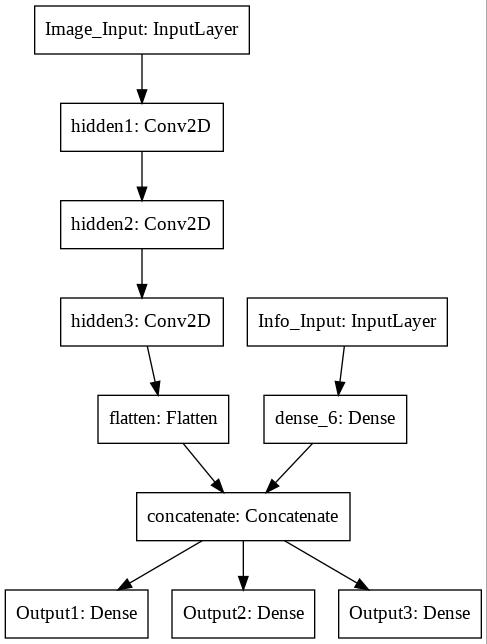

In [16]:
# ============================= 創建Model ============================= #
image_inputs = keras.Input(shape=(28, 28, 1), name='Image_Input')
hidden1 = layers.Conv2D(64, kernel_size=3, activation='relu', name='hidden1')(image_inputs)
hidden2 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden2')(hidden1)
hidden3 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden3')(hidden2)
flatten = layers.Flatten()(hidden3)

info_inputs = keras.Input(shape=(10, ), name='Info_Input')
hidden4 = layers.Dense(64)(info_inputs)

concat = layers.Concatenate()([flatten, hidden4])

weather_outputs = layers.Dense(1, name='Output1')(concat)
temp_outputs = layers.Dense(1, name='Output2')(concat)
humidity_outputs = layers.Dense(1, name='Output3')(concat)

model = keras.Model(inputs=[image_inputs, info_inputs], 
                    outputs=[weather_outputs, temp_outputs, humidity_outputs])
# ===================================================================== #


# 產生網絡拓撲圖
plot_model(model, to_file='Functional_API_Multi_Input_Multi_Output_Model.jpg')

# 秀出網絡拓撲圖
Image('Functional_API_Multi_Input_Multi_Output_Model.jpg')

### 練習1-3: tf.data讀取資料

`dataset`中參數為`[0, 1, 2, 3, ..., 63]`共64個數值，透過對`dataset`設定，每一次取**16**筆資料，並對整個dataset重複提取**3**次，輸出結果如下。

**Output:**
```
tf.Tensor([ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15], shape=(16,), dtype=int32)
tf.Tensor([16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31], shape=(16,), dtype=int32)
tf.Tensor([32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47], shape=(16,), dtype=int32)
tf.Tensor([48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63], shape=(16,), dtype=int32)
tf.Tensor([ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15], shape=(16,), dtype=int32)
tf.Tensor([16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31], shape=(16,), dtype=int32)
tf.Tensor([32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47], shape=(16,), dtype=int32)
tf.Tensor([48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63], shape=(16,), dtype=int32)
tf.Tensor([ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15], shape=(16,), dtype=int32)
tf.Tensor([16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31], shape=(16,), dtype=int32)
tf.Tensor([32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47], shape=(16,), dtype=int32)
tf.Tensor([48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63], shape=(16,), dtype=int32)
```

In [17]:
import tensorflow as tf

In [32]:
dataset = tf.data.Dataset.from_tensor_slices(tf.range(64))

# ============================ 設定dataset ============================ #
dataset = dataset.batch(16)
dataset = dataset.repeat(3)

# ===================================================================== #

for data in dataset:
    print(data)

tf.Tensor([ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15], shape=(16,), dtype=int32)
tf.Tensor([16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31], shape=(16,), dtype=int32)
tf.Tensor([32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47], shape=(16,), dtype=int32)
tf.Tensor([48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63], shape=(16,), dtype=int32)
tf.Tensor([ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15], shape=(16,), dtype=int32)
tf.Tensor([16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31], shape=(16,), dtype=int32)
tf.Tensor([32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47], shape=(16,), dtype=int32)
tf.Tensor([48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63], shape=(16,), dtype=int32)
tf.Tensor([ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15], shape=(16,), dtype=int32)
tf.Tensor([16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31], shape=(16,), dtype=int32)
tf.Tensor([32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47], shape=(16,), dtype=int32)
tf.Tensor([48 49 50 51 52 53 54 55 56 57 58